# [NA] MNIST classification with DNN

## Basic classification task with DNN

In [1]:
import time
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000
5000
10000


In [3]:
# parameter and hyperparameter setting
pixel=28
image_size=pixel*pixel
n_class=10
n_hidden1=200
n_hidden2=200

lr=0.01
training_epochs=15
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
print(total_batch)


550


In [4]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1,shape=shape))

def fc_layer(inputs,n_outputs,activation=tf.nn.relu,keep_prob=1):
    n_inputs=int(inputs.shape[1])
    W_fc=weight_variable([n_inputs,n_outputs])
    b_fc=bias_variable([n_outputs])
    logit_fc=tf.matmul(inputs,W_fc)+b_fc
    _a_fc=activation(logit_fc)
    a_fc=tf.nn.dropout(_a_fc,keep_prob=keep_prob)
    return a_fc,logit_fc

In [5]:
x=tf.placeholder('float32',[None,image_size])
y_=tf.placeholder('float32',[None,n_class])

fc_layer1,_=fc_layer(x,n_hidden1,activation=tf.nn.relu,keep_prob=1)
fc_layer2,_=fc_layer(fc_layer1,n_hidden2,activation=tf.nn.relu,keep_prob=1)
fc_layer3,logit3=fc_layer(fc_layer2,n_class,activation=tf.nn.relu,keep_prob=1)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit3,labels=y_))
optimizer=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# W1=tf.Variable(tf.random_normal([image_size,n_hidden1]))
# W2=tf.Variable(tf.random_normal([n_hidden1,n_hidden2]))
# W3=tf.Variable(tf.random_normal([n_hidden2,n_class]))

# b1=tf.Variable(tf.random_normal([n_hidden1]))
# b2=tf.Variable(tf.random_normal([n_hidden2]))
# b3=tf.Variable(tf.random_normal([n_class]))

# a1=tf.nn.relu(tf.matmul(x,W1)+b1)
# a2=tf.nn.relu(tf.matmul(a1,W2)+b2)

## softmax cause some problem in learning. 
## If we set the flow as some ex line using softmax, the learnig is failed.
## logit3=tf.nn.softmax(tf.matmul(a2,W3)+b3)
# logit3=tf.matmul(a2,W3)+b3

## cost=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(softmax(logit3)),reduction_indices=[1]))
#cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit3,labels=y_))
## optimizer=tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
#optimizer=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

print(cost)
print(optimizer)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Tensor("Mean:0", shape=(), dtype=float32)
name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/update_Variable_2/ApplyAdam"
input: "^Adam/update_Variable_3/ApplyAdam"
input: "^Adam/update_Variable_4/ApplyAdam"
input: "^Adam/update_Variable_5/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [6]:
sess=tf.Session()
start_time=time.time()
init=tf.global_variables_initializer()
sess.run(init)
# init=tf.initialize_all_variables() is same with global_variables_initializer
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x:batch_xs,y_:batch_ys})
        avg_cost+=sess.run(cost,feed_dict={x:batch_xs,y_:batch_ys})/total_batch
    avg_cost_list.append(avg_cost)

train_time=time.time()
print('training time: %.5f' % (train_time-start_time))

plt.plot(range(training_epochs),avg_cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')
correct_prediction=tf.equal(tf.argmax(logit3,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print('accuracy : '+str(ac*100)+'%')

sess.close()
sess_time=time.time()
print('session time: %.5f'+(sess_time-start_time))


TypeError: Can't convert 'float' object to str implicitly

## (plus) Xavier initialization

In [7]:
def xavier_initializer(n_inputs,n_outputs,uniform=True):
    if uniform:
        init_range=tf.sqrt(6./(n_inputs+n_outputs))
        return tf.random_uniform_initializer(-init_range,init_range)
    else:
        stddev=tf.sqrt(3./(n_inputs+n_outputs))
        return tf.truncated_normal_initializer(stddev=stddev)

96.7500090599%


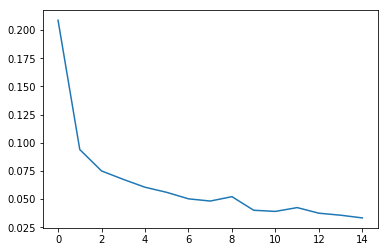

In [10]:
tf.reset_default_graph()
# almost same code with basic classification task with DNN except variable declaration part
W1=tf.get_variable(name='W1',shape=[image_size,n_hidden1],
                   initializer=xavier_initializer(image_size,n_hidden1))
W2=tf.get_variable(name='W2',shape=[n_hidden1,n_hidden2],
                   initializer=xavier_initializer(n_hidden1,n_hidden2))
W3=tf.get_variable(name='W3',shape=[n_hidden2,n_class],
                   initializer=xavier_initializer(n_hidden2,n_class))
# original code: W3=tf.Variable(tf.random_normal([n_hidden2,n_class]))

b1=tf.Variable(tf.random_normal([n_hidden1]))
b2=tf.Variable(tf.random_normal([n_hidden2]))
b3=tf.Variable(tf.random_normal([n_class]))

x=tf.placeholder('float32',[None,image_size])
y_=tf.placeholder('float32',[None,n_class])

a1=tf.nn.relu(tf.matmul(x,W1)+b1)
a2=tf.nn.relu(tf.matmul(a1,W2)+b2)
a3=tf.matmul(a2,W3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=a3,labels=y_))
optimizer=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x:batch_xs,y_:batch_ys})
        avg_cost+=sess.run(cost,feed_dict={x:batch_xs,y_:batch_ys})/total_batch
    avg_cost_list.append(avg_cost)

plt.plot(range(training_epochs),avg_cost_list)

correct_prediction=tf.equal(tf.argmax(a3,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print('accuracy : '+str(ac*100)+'%')


In [11]:
sess.close()

## (plus) dropout technique for preventing overfitting in deeper neural network

accuracy : 98.0500102043%


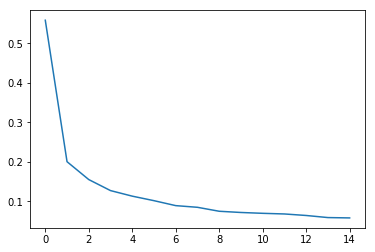

In [28]:
tf.reset_default_graph()
_dropout_rate=0.7
lr=0.001
# almost same code with basic classification task with DNN except model constructino part
W1=tf.get_variable(name='W1',shape=[image_size,n_hidden1],
                   initializer=xavier_initializer(image_size,n_hidden1))
W2=tf.get_variable(name='W2',shape=[n_hidden1,n_hidden2],
                   initializer=xavier_initializer(n_hidden1,n_hidden2))
W3=tf.get_variable(name='W3',shape=[n_hidden1,n_hidden2],
                   initializer=xavier_initializer(n_hidden1,n_hidden2))
W4=tf.get_variable(name='W4',shape=[n_hidden1,n_hidden2],
                   initializer=xavier_initializer(n_hidden1,n_hidden2))
W5=tf.get_variable(name='W5',shape=[n_hidden2,n_class],
                   initializer=xavier_initializer(n_hidden2,n_class))

b1=tf.Variable(tf.random_normal([n_hidden1]))
b2=tf.Variable(tf.random_normal([n_hidden2]))
b3=tf.Variable(tf.random_normal([n_hidden2]))
b4=tf.Variable(tf.random_normal([n_hidden2]))
b5=tf.Variable(tf.random_normal([n_class]))

x=tf.placeholder('float32',[None,image_size])
y_=tf.placeholder('float32',[None,n_class])
dropout_rate=tf.placeholder('float')

# dropout part
_a1=tf.nn.relu(tf.matmul(x,W1)+b1)
a1=tf.nn.dropout(_a1,keep_prob=dropout_rate)
_a2=tf.nn.relu(tf.matmul(a1,W2)+b2)
a2=tf.nn.dropout(_a2,keep_prob=dropout_rate)
_a3=tf.nn.relu(tf.matmul(a2,W3)+b3)
a3=tf.nn.dropout(_a3,keep_prob=dropout_rate)
_a4=tf.nn.relu(tf.matmul(a3,W4)+b4)
a4=tf.nn.dropout(_a4,keep_prob=dropout_rate)
a5=tf.matmul(a4,W5)+b5

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=a5,labels=y_))
optimizer=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x:batch_xs,y_:batch_ys,dropout_rate:_dropout_rate})
        avg_cost+=sess.run(cost,feed_dict={x:batch_xs,y_:batch_ys,
                                           dropout_rate:_dropout_rate})/total_batch
    avg_cost_list.append(avg_cost)

plt.plot(range(training_epochs),avg_cost_list)

correct_prediction=tf.equal(tf.argmax(a5,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))

# In the case of prediction, dropout rate should be 1. 
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels,dropout_rate:1})
print('accuracy : '+str(ac*100)+'%')


In [29]:
sess.close()